# Turborreactor Básico: Ejemplo de Resolución

Se tiene un motor de reacción como el de la figura siguiente. El turborreactor funciona aspirando aire ambiente y eyectándolo a mayor velocidad por la tobera generando empuje en la dirección del movimiento.

El turborreactor opera en diferentes condiciones de altitud y velocidad de vuelo. En concreto para cada altitud $h_i$ se ensayan todas las velocidades de vuelo $v_j$ siempre que el Mach de vuelo sea $0.3\leqslant M\leqslant0.95$:
$$h_i=[0, 3000, 6000, 8000, 11000] m$$

$$v_i=[100, 150, 200, 250, 300, 320] \frac{m}{s}$$



<center><img src="./Recursos/turborreactor_basico.png"></center>


### Datos del turborreactor:
#### Difusor:
- $\eta_d=1$ (isoentrópico)
- $R_0=0.40m$

#### Tobera:
- $\eta_{To}=1$ (isoentrópico)
- $R_0=0.25m$
- Tobera adaptada, no bloqueada

#### Compresor
- Acoplado a la turbina ($\dot{|W_C|} = \dot{|W_T|}$)
- Mach de vuelo:
  - Si $M<0.5$
    - $\eta_c=0.7$
  - Si $0.5\leqslant M\leqslant0.9$
    - $\eta_c=0.7+0.2·\frac{M-0.5}{0.4}$
  - Si $M>0.9$
    - $\eta_c=0.9$
- $\Pi_{32}=20$

#### Turbina
- Acoplado al compresor ($\dot{|W_C|} = \dot{|W_T|}$)
- Mach de vuelo:
  - Si $T_{4t}<1000K$
    - $\eta_T=0.88$
  - Si $1000K\leqslant T_{4t}\leqslant2000K$
    - $\eta_T=0.88+0.1·\frac{T_{4t}-1000}{1000}$
  - Si $T_{4t}>2000K$
    - $\eta_T=0.98$

#### Cámara de Combustión
- Queroseno tipo para la combustión ($C_{14}H_{26}$)
- $L=43.25\frac{MJ}{kg}$
- $f=0.3f_{est}$
- $c = fG$
- $\Pi_{43}=0.95$
- $\eta_q=0.95$

### Datos del aire:
#### Temperatura (ISA+0)
$$T(h)=298.15K - 6.5\frac{h}{1000m} K$$

#### Presión en función de la altura:
$$P(h) = 101325 (-2.25577·10^{-5}·h(m))^{5.225588}$$

#### Modelo de Calor Específico Real:
$$c_p(T) = c_p{_0} + c_p{_1}(T-273) + c_p{_2}(T-273)^2$$
$$c_p{_0} = 1004 \frac{J}{kg K}$$
$$c_p{_1} = 0.1153 \frac{J}{kg K^2}$$
$$c_p{_2} = 1.564·10^{-4} \frac{J}{kg K^3}$$

#### Coeficiente de Dilatación Adiabático:
$$\gamma_a(T)=1.405 - 0.11\frac{T-175}{1825}$$

#### Constante del aire:
$$R_a(T)=c_p(T) - c_v(T)=c_p(T) - \frac{c_p(T)}{\gamma_a(T)}$$

### Masas Moleculares
- Hidrógeno: $M_H=1\frac{g}{mol}$
- Oxígeno: $M_O=16\frac{g}{mol}$
- Nitrógeno: $M_N=14\frac{g}{mol}$
- Carbono: $M_C=12\frac{g}{mol}$
- Aire: $M_a=0.21·2·M_O + 0.79·2·M_N$
- Queroseno: $M_q=14·M_C + 26·M_H$

##### Objetivo:
Obtener empuje, impulso específico, consumo específico, rendimiento motor, rendimiento propulsor y rendimiento motopropulsor del turborreactor para cada condición de vuelo (altitud-velocidad) que cumpla el criterio de Mach $0.3\leqslant M\leqslant 0.95$.

Con motivo de que la resolución de este turborreactor quede lo más didáctica posible, se plantea en primer lugar la solución de una condición de vuelo ($h_0=0m, P_0=101325Pa, v_0=250\frac{m}{s}$) y luego se resuelven, en bucle, todas las condiciones de vuelo que cumplan el criterio de Mach.

# Resolución:
## Pasos a seguir:
Para empezar la solución de la entrega, en primer lugar se incorporan al código los datos del problema (datos del aire, de cada etapa del turborreactor, del combustible y de la condición de vuelo). Luego se da paso a calcular las condiciones de vuelo consideradas y evaluar cuales cumplen y cuales no (las que no cumplan, no serán calculadas). Una vez se haya obtenido la lista de condiciones de vuelo, se puede proceder a resolver el Turborreactor.
0. **Importaciones**
    1. _Numpy_
    2. _Pyplot_ de _Matplotlib_
    3. Axes3D de mpl_toolkits
    4. _Sympy_
1. **Datos del aire**
    1. $T$
    2. $P$
    3. $c_p$
    4. $\gamma$
    5. $R_a$
    6. Mach
2. **Datos del turborreactor**
    1. Datos independientes a la condición de vuelo:
        1. Área de entrada al TB
        2. Área de salida al TB
        3. Proceso de combustión y dosado
    2. Datos del compresor y turbina
        1. Rendimiento adiabático de compresor
        2. Rendimiento adiabático de turbina
        3. Acoplamiento mecánico compresor-turbina
    3. Magnitudes de remanso
    4. Actuaciones del Turborreactor:
        1. Empuje
        2. Impulso específico
        3. Consumo específico
    5. Rendimientos:
        1. Motor
        2. Propulsor
        3. Motopropulsor
3. **Condición de vuelo**
    1. Obtención de la condición de vuelo ($h_0, v_0$) y de las propiedades termodinámicas estáticas ($P_0, T_0, \rho_0$) y del Mach
    2. Evaluación del cumplimiento de la condición de Mach. Para los casos de cumplimiento se resuelve el Turborreactor
4. **Solución del Turborreactor para una condición de vuelo:**
    1. Condiciones del difusor (presión, temperatura, densidad y gasto de aire)
    2. Presión y temperatura de remanso en el compresor
    3. Asumiendo gasto de combustible no despreciable, cálculo de presión y temperatura de remanso en la cámara de combustión
    4. Acoplamiento mecánico de la turbina y el compresor
    5. Obtención de temperatura y presión en la tobera, acoplando la velocidad y el gasto
    6. Cálculo del empuje, el impulso específico, el consumo específico
    7. Cálculo de los rendimientos
5. **Solución de todas las condiciones de vuelo viables**
6. **Figuras y resultados**

### 1) Importaciones:

In [22]:
#Importaciones de librerias necesarias
import numpy as np
#%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
from sympy import *
#init_session(use_latex=True)

#Masas moleculares:
Mc = 12 #u - carbono
Mh = 1  #u - hidrógeno
Mo = 16 #u - oxígeno
Mn = 14 #u -  nitrógeno

### 2) Datos del aire:
Temperatura y presión en función de la altura, cp y gamma como funciones de la temperatura, constante del aire como función del cp y gamma y número de Mach:

In [23]:
#Temperatura en función de la altura:
Temp_base = 15 #ºC
Pres_base = 101325 #Pa
def Temp(h, Temp_base=15):
    if h<0 or h>15000:
        print('Altura de vuelo errónea!')
    else:
        return Temp_base - 6.5*h/1000 + 273.15

#Presión en función de la altura:
def Pres(h, Pres_base=101325):
    if h<0 or h>15000:
        print('Altura de vuelo errónea!')
    else:
        return Pres_base*(1-2.25577*h*1e-5)**5.25588

#Calor específico en función de la temperatura:
def cp(T):
    cp0 = 1004
    cp1 = 0.1153
    cp2 = 1.564e-4
    if T<273:
        cp_=1004
    elif T<=2000:
        cp_ = cp0 + cp1*(T-273) + cp2*(T-273)**2
    else:
        print('Temperatura del aire demasiado alta!')
    return cp_

#Coeficiente de dilatación adiabático del aire:
def gamma_a(T):
    if T<175:
        return 1.405
    elif T<=2000:
        return 1.405 - 0.11*(T-175)/1825
    else:
        print('Temperatura del aire demasiado alta!')

#Constante del aire en función de la temperatura:
def Ra(T):
    return cp(T) - cp(T)/gamma_a(T)

#Número de Mach:
def Mach(v, T):
    return v/np.sqrt(gamma_a(T)*Ra(T)*T)

#Masa Molecular del aire:
Maire = 0.21*2*Mo + 0.79*2*Mn

### 3) Datos del Turborreactor
#### A)Datos Independientes de la condición de vuelo del Difusor, Tobera y Cámara de Combustión:

In [24]:
#Geometría de Entrada y Salida:
R0 = 0.4 #m
A0 = np.pi*R0**2 #m² área de entrada al TB
Rs = 0.25 #m
As = np.pi*Rs**2 #m² área de salida de la tobera

La reacción de combustión con queroseno es:
$$ C_{14}H_{26} + 20.5(O_2+3.76N_2) \rightarrow 14CO_2 + 6.5H_2O + 76.86N_2$$

In [25]:
#Condiciones de la combustión:
#Poder Calorífico:
L=43.25e6 #J/kg

#Masa molecular:
Mq = 14*Mc + 26*Mh

#Dosado estequiométrico y real:
fest = Mq / ((14 + 26/4)*4.76*Maire)
f = 0.3*fest

#Rendimiento de la combustion y pérdida de presión en la cámara
Pi43 = 0.95
eta_q = 0.95

#### B) Datos del Compresor y la Turbina

In [26]:
#Relación de compresión Difusor-Compresor:
Pi32 = 20

#Rendimiento del compresor en función del Mach
def Rend_compr(M):
    if M>0 and M<0.5:
        eta_c = 0.7
    elif M>=0.5 and M<=0.9:
        eta_c = 0.7 + 0.2*(M-0.5)/0.4
    else:
        eta_c = 0.9
    return eta_c
        
#Rendimiento de la turbina en función de la temperatura fin de combustión:
def Rend_turb(T4t):
    if T4t<1000:
        eta_t = 0.88
    elif T4t>= 1000 and T4t<=2000:
        eta_t = 0.88 + 0.1*(T4t - 1000)/1000
    else:
        eta_t = 0.98
    return eta_t

El acoplamiento mecánico entre compresor y turbina impone el incremento de entalpía entre las estaciones 23 y 45 (iguales y de signo contrario). Como la temperatura $T_{3t}$ fin de compresión se puede obtener mediante las condiciones de entrada (difusor isoentrópico) y el rendimiento adiabático del compresor, el acoplamiento mecánico nos ofrece la temperatura de remanso tras la expansión en función del compresor y la temperatura $T_{4t}$:

$$\dot{W_C}+\dot{W_T}=0 \Rightarrow G·c_p(T)·(T_{3t}-T_{2t})=-(G+c)·c_p(T)(T_{5t}-T_{4t})$$
$$T_{5t}=-\frac{G}{G+c}\frac{c^{comp}_p(T)}{c^{turb}_p(T)}\left( T_{3t}-T_{2t}\right) + T_{4t} \Rightarrow T_{5t}=-\frac{1}{1+f}\frac{c^{comp}_p(T)}{c^{turb}_p(T)}\left( T_{3t}-T_{2t}\right) + T_{4t}$$

Para calcular el $c_p(T)$ en la estación de compresión y en la de expansión podemos asumir que la temperatura media es $T_{comp}=\frac{T_{3t}-T_{2t}}{2}$ y $T_{turb}=\frac{T_{5t}-T_{4t}}{2}$ respectivamente.

La temperatura $T_{5t}$ que se quiere resolver está presente, por tanto, en el $c_p$. Una manera sencilla de obtener la temperatura de remanso a la salida de la turbina sin tener que resolver la ecuación resultante de sustituir el $c_p(T_{5t})$ en la expresión anterior es iterando entre $T_{5t}$ y la temperatura media de la estación de expansión. El proceso sería:
1. <center>Asumir una $T^0_{5t}$ inicial (por ejemplo $T^0_{5t}=T_{4t}$) para empezar a iterar
</center>
2. <center>Obtener $T^i_{turb}=\frac{T^{i-1}_{5t}-T_{4t}}{2}$
</center>
3. <center>Calcular  $c^i_p(T^i_{turb})$
</center>
4. <center>Resolver $T^i_{5t}=-\frac{1}{1+f}\frac{c^{comp}_p(T_{comp})}{c^{turb}_p(T^i_{turb})}\left( T_{3t}-T_{2t}\right) + T_{4t}$
</center>
5. <center> Si el residuo (la diferencia entre dos iteraciones consecutivas) de las temperaturas $T_{5t}$ es menor que una cantidad prefijada $\epsilon > |T^i_{5t} - T^{i-1}_{5t}|$ se obtiene la temperatura $T_{5t}$. Si no, se sigue iterando entre los pasos 2, 3, 4 y 5 

In [27]:
def T5t_func(f, T2t, T3t, T4t):
    #Temperatura promedio en la etapa de compresión:
    Tcomp = 0.5*(T3t+T2t)
    
    #Asumimos la temperatura media de la turbina como la T4t e iniciamos las iteraciones:
    T5t = T4t
    sigue_iterando = True
    contador = 1
    
    #Iteraciones para resolver T5t:
    while sigue_iterando:
        T5t_ = T5t #Se guarda la temperatura T5t anterior
        
        #Estimación de la temperatura media con la temperatura T5t de la iteracion anterior:
        Tturb = 0.5*(T4t+T5t)
        
        #Obtención de nueva T5t:
        T5t = -1/(1+f)*cp(Tcomp)*(T3t - T2t)/(cp(Tturb)) + T4t
        
        #Cálculo de la diferencia entre la estimación anterior y la nueva:
        residuo = abs((T5t - T5t_)/T5t_)
        
        #Evaluación de la condición de parada:
        if residuo <=1e-6:
            #Se cumple la tolerancia impuesta: T5t obtenida!
            sigue_iterando = False
        elif contador>999:
            #Demasiadas iteraciones. T5t aproximada (comprobar el valor)
            sigue_iterando = False
        else:
            sigue_iterando = True
            contador += 1 #Actualización del indice de la iteración
        #print(contador, T5t, T5t_, residuo)
    return T5t


La resolución de la temperatura de remanso a la salida de la turbina depende del salto de entalpía del compresor y ésta a su vez del incremento de temperatura (donde aparece de la temperatura del difusor y del compresor) y del $c_p$, que es función de la temperatura media del compresor donde vuelve a aparecer $T_{3t}$.
$$ \Delta H_{32} = G·c_p(T_{comp})·(T_{3t}-T_{2t})$$

Se puede plantear un esquema similar al de $T_{5t}$ (iterar asumiendo una $T_{3t}$ inicial e ir haciendo converger la solución). De todas formas, como la diferencia de temperaturas entre $T_{3t}$ y $T_{2t}$ es apreciablemente inferior a $T_{5t}$ y $T_{4t}$, se podría discutir la conveniencia de plantear la hipótesis de que $T_{comp}=T_{2t}$.

En cualquier caso, la presente solución se obtendrá iterando sobre $T_{3t}$ de manera análoga a $T_{5t}$.

In [28]:
#Obtención de T3t:
def T3t_func(T2t, Pi32, eta_c):
    #Asumimos la temperatura media del compresor como la T3t e iniciamos las iteraciones:
    T3t = T2t
    sigue_iterando = True
    contador = 1
    
    #Iteraciones para resolver T3t:
    while sigue_iterando:
        T3t_ = T3t #Se guarda la temperatura T3t anterior
        
        #Estimación de la temperatura media con la temperatura T3t de la iteracion anterior:
        Tcomp = 0.5*(T3t+T2t)
        
        #Obtención de nueva T3t:
        T3t = T2t * (((Pi32)**((gamma_a(Tcomp)-1)/gamma_a(Tcomp))-1)/eta_c + 1)
        
        #Cálculo de la diferencia entre la estimación anterior y la nueva:
        residuo = abs((T3t - T3t_)/T3t_)
        
        #Evaluación de la condición de parada:
        if residuo <=1e-1:
            #Se cumple la tolerancia impuesta: T3t obtenida!
            sigue_iterando = False
        elif contador>999:
            #Demasiadas iteraciones. T3t aproximada (comprobar el valor)
            sigue_iterando = False
        else:
            sigue_iterando = True
            contador += + 1 #Actualización del indice de la iteración
            
        print(contador, T3t, T3t_,Tcomp, residuo)
    return T3t


##### C) Magnitudes de remanso:
**Temperatura de Remanso:** $$T_t = T + \frac{v^2}{2c_p}\Rightarrow \frac{T_t}{T}=\left(1+\frac{\gamma(T)-1}{2}M^2\right)$$

**Presión de Remanso:**
$$\frac{P_t}{P}=\left(\frac{T_t}{T}\right)^{\frac{\gamma(T)}{\gamma(T)-1}}$$

**Densidad de Remanso:**
$$\frac{\rho_t}{\rho}=\left(\frac{T_t}{T}\right)^{\frac{\gamma(T)-1}{\gamma(T)}}$$

**Velocidad de la corriente dadas las temperaturas de estática y remanso**:

$$v=\sqrt{2\left( T_t-T\right)c_p(T)}$$

In [29]:
#Función Gamma
def Gamma_func(T, M):
    return (1+0.5*(gamma_a(T)-1)*M**2)

#Temperatura de remanso en función del Mach
def Tt(T, M):
    return (T*Gamma_func(T, M))

#Temperatura de remanso en función de la velocidad
def Ttv(T, v):
    return T + 0.5*v*v/cp(T)

#Velocidad del fluido dadas las condiciones de remanso y estática
def v_Tt(Tt, T):
    return (np.sqrt(2*(Tt-T)*cp(T)))

#Presión de remanso en función del Mach
def Pt(P, T, gamma, M):
    return P*(Gamma_func(T, M))**(gamma_a(T)/(gamma_a(T)-1))

#Densidad de remanso en función del Mach
def rhot(rho, gamma, M):
    return rho*(Gamma_func(T, M))**((gamma_a(T)-1)/gamma_a(T))

##### D) Cálculo del Empuje, Impulso Específico y Consumo Específico
La obtención del Empuje neto y el Impulso Específico del Turborreactor viene impuesto por la velocidad de salida del fluido. La corriente se expande de forma ideal en la tobera (isentrópica y adaptada), con lo que a través del rendimiento de la tobera se puede resolver la velocidad del fluido si se tienen las condiciones termodinámicas de remanso y estáticas.

La resolución de la temperatura de salida a través del rendimiento adiabático de la tobera (unidad) implica, de nuevo, estimar el $c_p$ en condiciones de temperatura de la tobera. Dicha temperatura, al uso del compresor y la turbina, se promediará como:

$$T_{tob}=\frac{T_{8t}+T_8}{2}$$

Lo cual nos lleva a, por comodidad, plantear $ T_8$ mediante un proceso iterativo que converja hacia la solución real.

In [30]:
#Obtención de T8:
def T8_func(T5t, Pi85, eta_tob):
    #Asumimos la temperatura media de la tobera como la T5t e iniciamos las iteraciones:
    T8 = T5t
    sigue_iterando = True
    contador = 1
    
    #Iteraciones para resolver T4t:
    while sigue_iterando:
        T8_ = T8 #Se guarda la temperatura T4t anterior
        
        #Estimación de la temperatura media con la temperatura T8 de la iteracion anterior:
        Ttob = 0.5*(T8+T5t)
        
        #Obtención de nueva T4t:
        T8 = ((Pi85**((gamma_a(Ttob)-1)/gamma_a(Ttob)) - 1)*eta_tob + 1)*T5t
        
        #Cálculo de la diferencia entre la estimación anterior y la nueva:
        residuo = abs((T8 - T8_)/T8_)
        
        #Evaluación de la condición de parada:
        if residuo <=1e-6:
            #Se cumple la tolerancia impuesta: T8 obtenida!
            sigue_iterando = False
        elif contador>999:
            #Demasiadas iteraciones. T8 aproximada (comprobar el valor)
            sigue_iterando = False
        else:
            sigue_iterando = True
            contador += 1 #Actualización del indice de la iteración
            
#        print(contador, T5t,Pi85,T8, T8_,Ttob, residuo, gamma_a(Ttob))
    return T8

Por otro lado, las actuaciones del turborreactor (empuje neto, impulso específico y consumo específico) responden a las siguientes expresiones:

**Empuje:** $ E = (G+c)V_s - GV_0 + (P_s - P_0)A_s$

**Impulso:** $I_E = \frac{E}{G} \approx V_s - V_0$

**Consumo Específico:** $C_E=\frac{c}{E} \approx \frac{f}{V_s - V0}$

In [31]:
#Empuje, impulso específico y consumo específico del Turborreactor
def actuaciones_TB(G, c, vs, v0, Ps, P0, As):
    #Empuje entre difusor y tobera del TB
    E = (G+c)*vs - G*v0 + (Ps-P0)*As
    #Impulso específico total (sin aproximar la Ps)
    Ie= E/G
    
    #Consumo específico total (sin aproximar la presión de salida)
    Ce=c/E
    
    return E, Ie, Ce


##### E) Rendimientos:
**Rendimiento Motor:** $\eta_{motor}=\frac{E_{neto}v_0 + \frac{1}{2}(G+c)(v_s-v_0)^2 -\frac{1}{2}cv_0^2}{cL}$

**Rendimiento Propulsor:** $\eta_{propulsor}=\frac{E_{neto}v_0}{E_{neto}v_0 + \frac{1}{2}(G+c)(v_s-v_0)^2 -\frac{1}{2}cv_0^2}$

**Rendimiento Motopropulsor:**
$\eta_{mp}=\frac{E_{neto}v_0}{cL}$

In [32]:
# Rendimiento motor, propulsor y motopropulsor:
def rendimiento_TB(Eneto, G, c, vs, v0, L):
    #Rendimiento motor:
    eta_m = (Eneto*v0+0.5*(G+c)*(vs-v0)**2-0.5*c*v0**2)/(c*L)
    
    #Rendimiento propulsor:
    eta_p = Eneto*v0/(Eneto*v0 + 0.5*(G+c)*(vs-v0)**2-0.5*c*v0**2)
    
    #Rendimiento motopropulsor:
    eta_mp = eta_m * eta_p
    
    return eta_m, eta_p, eta_mp
    

### 4) Condición de Vuelo
En total se ensayarán las condiciones de altitud $h_i=[0, 3000, 6000, 8000, 13000] m$ y velocidad $v_i=[100, 150, 200, 250, 300, 320] \frac{m}{s}$ que cumplan $0.3\leqslant M\leqslant0.95$

In [33]:
#Todas la condiciones de velocidad y altura:
altitud = [0, 3000, 6000, 8000, 13000] #m
velocidad = [100, 150, 200, 250, 300, 320] #m/s
ii = 0

#Preparamos una lista vacía para guardar T0, P0, rho0, M0 y si cumple o no el criterio de Mach
casos = [None]*len(altitud)*len(velocidad)
for h0 in altitud:
    for v0 in velocidad:
        #Obtención de las condiciones de entrada al TB para cada condición de vuelo
        T0 = Temp(h0)
        P0 = Pres(h0)
        rho0 = P0/Ra(T0)/T0
        M0 = Mach(v0, T0)
        if M0 >=0.3 and M0<=0.95:
            #Cumplimiento de la condición de Mach
            volado = True
        else:
            volado = False
        #Se almacena la condición de entrada y la de Mach
        casos[ii] = [volado, T0, P0, rho0, M0, h0, v0]
        ii += 1

Las condiciones de vuelo que cumplen el criterio de Mach son:

h0=    0m, v0=150.0m/s, Mach=0.442, T0=288.1K, P0=101325Pa, rho0=1.2277kg/m³, 
h0=    0m, v0=200.0m/s, Mach=0.589, T0=288.1K, P0=101325Pa, rho0=1.2277kg/m³, 
h0=    0m, v0=250.0m/s, Mach=0.736, T0=288.1K, P0=101325Pa, rho0=1.2277kg/m³, 
h0=    0m, v0=300.0m/s, Mach=0.883, T0=288.1K, P0=101325Pa, rho0=1.2277kg/m³, 
h0=    0m, v0=320.0m/s, Mach=0.942, T0=288.1K, P0=101325Pa, rho0=1.2277kg/m³, 
h0= 3000m, v0=100.0m/s, Mach=0.305, T0=268.6K, P0=70109Pa, rho0=0.9108kg/m³, 
h0= 3000m, v0=150.0m/s, Mach=0.457, T0=268.6K, P0=70109Pa, rho0=0.9108kg/m³, 
h0= 3000m, v0=200.0m/s, Mach=0.609, T0=268.6K, P0=70109Pa, rho0=0.9108kg/m³, 
h0= 3000m, v0=250.0m/s, Mach=0.762, T0=268.6K, P0=70109Pa, rho0=0.9108kg/m³, 
h0= 3000m, v0=300.0m/s, Mach=0.914, T0=268.6K, P0=70109Pa, rho0=0.9108kg/m³, 
h0= 6000m, v0=100.0m/s, Mach=0.316, T0=249.1K, P0=47181Pa, rho0=0.6595kg/m³, 
h0= 6000m, v0=150.0m/s, Mach=0.474, T0=249.1K, P0=47181Pa, rho0=0.6595kg/m³, 
h0= 6000m, v0=200.0m/s, Mach=0.632, T0=249.1K, P0=47181Pa, 

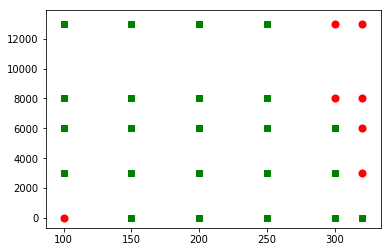

In [34]:
#%matplotlib inline
plt.figure()
for item in casos:
    if item[0] is True:
        print('h0={5:5.0f}m, v0={6:1.1f}m/s, Mach={4:1.3f}, T0={1:3.1f}K, P0={2:5.0f}Pa, rho0={3:1.4f}kg/m³, '.format(*item))
        plt.scatter(item[6], item[5], s=30, c='g', marker='s')
    else:
        plt.scatter(item[6], item[5], s=50, c='r', marker='o')
plt.show()



### 5) Solución del Turborreactor para cada Condición de Vuelo:
##### A) Difusor:
Con la condición de difusor isentrópico, y para cada condición de vuelo, se tienen las condiciones de remanso en la entrada a partir de las propiedades termodinámicas estáticas (P0, T0, rho0):
$$T_{0t}=T_0·(1+\frac{\gamma(T)-1}{2}M^2)=T_{2t}$$

$$P_{0t}=P_0·\left(1+\frac{\gamma(T)-1}{2}M^2\right)^{\frac{\gamma(T)}{\gamma(T)-1}}= P_{2t}$$

$$\rho_{0t}=\rho_0·\left(1+\frac{\gamma(T)-1}{2}M^2\right)^{\frac{\gamma(T)-1}{\gamma(T)}} = \rho_{2t}$$

Ahora, con la densidad estática, obtenida con la ecuación de estado, se puede calcular el gasto de aire entrante al turborreactor:

$$ \rho_0=\frac{P_0}{R_a(T_0)T_0}$$

$$ G = \rho_0 v_0 A_0 $$

##### B) Compresor:
Siempre que se conozca la relación de compresión, la presión de remanso puede obtenerse de manera directa si se tienen las condiciones de remanso en la etapa anterior:

$$P_{3t}=\Pi_{32}P_{2t}$$

Para obtener la temperatura se puede recurrir al rendimiento adiabático. Téngase en cuenta que hay que estimar la temperatura media del compresor $T_{comp}=\frac{T_{3t}-T_{2t}}{2}$ para obtener el coeficiente de dilatación adiabático, y que el rendimiento adiabático es a la vez una función del número de Mach ($M_0$) de manera que el compresor es mś eficiente conforme aumenta la velocidad de vuelo.

$$ \eta_c= \frac{\frac{T_{3t}}{T_{2t}}-1}{\frac{P_{3t}}{P_{2t}}^{\frac{\gamma(T_{comp})-1}{\gamma(T_{comp})}} - 1} = f(M)$$ 

In [35]:
_, T0, P0, rho0, M0, h0, v0 = casos[9]

#Difusor:
T2t = Tt(T0, M0)
P2t = Pt(P0, T0, gamma_a(T0), M0)
G = rho0 * A0 * v0

#Compresor:
P3t = P2t*Pi32
T3t = T3t_func(T2t, Pi32, Rend_compr(M0))


2 784.8636257981425 299.7754980079681 299.7754980079681 1.618171368286012
2 765.9096261001832 784.8636257981425 542.3195619030553 0.024149417905161022


##### C) Cámara de Combustión:
La cámara de combustión opera con un rendimiento del 95%. Así pues, la temperatura fin de combustión dependerá del dosado y el poder calorífico del combustible mediante un rendimiento de 0.95 de la siguiente manera:

$$ \eta_q = \frac{(1+f)·c_p(T_{comb})\left(T_{4t}-T_{3t}\right)}{fL}$$

Además la cámara de combustión introduce una pequeña pérdida de presión ($\Pi_{43}=0.95$), con lo que la presión puede obtenerse según:

$$ P_{4t} = \Pi_{43}·P_{3t} = \Pi_{43}·\Pi_{32}·P_{2t}$$

In [36]:
#Presión a la salida de la cámara de combustión
P4t = Pi43*P3t

A estas alturas no sorprenderá que el calor específico del aire se vaya calcular utilizando la temperatura promedio del combustor $T_{comb} = \frac{T_{4t} + T_{3t}}{2}$ entre la entrada y la salida de éste. La expresión a resolver quedaría:

$$T_{4t} = \frac{fL\eta_q}{\left(1+f\right)·c_p\left(\frac{T_{4t} + T_{3t}}{2}\right)} + T_{3t}$$

Si ahora se sustituye el polinomio de segundo orden de $c_p$ se obtiene la ecuación de tercer grado que resuelve la temperatura fin de combustión. De nuevo la manera más sencilla de acometer la solución de $T_{4t}$ sería plantear un proceso iterativo que pare cuando la temperatura esté aproximada lo suficiente. Como ya se ha planteado dos veces el proceso iterativo, se va a resolver la ecuación de tercer grado con simpy para plantear una manera nueva de abordar la solución:

In [37]:
#Obtención de la T4t con Simpy:

#Variable T4t:
T4t_ = symbols('T4t_')

#Constantes:
cp0 = 1004 #J/kg/K
cp1 = 0.1153 #J/kg/K²
cp2 = 1.564e-4 #J/kg/K³

#Ecuación a resolver:
eq1 = Eq((T4t_-T3t)*(cp0 + cp1*0.5*(T4t_+T3t-273) + cp2*((T4t_+T3t-273)/2)**2), f*L*eta_q/(1+f))

#Solución de la expresión eq1:
soluciones = solve(eq1, T4t_)

#Se descartan las soluciones complejas. La solución real es la temperatura fin de combustión:
for valor in soluciones:
    
    if valor.is_real is True:
        T4t = float(valor)
print(soluciones)


[1427.22862102762, -1560.78139977874 - 5175.16068295623*I, -1560.78139977874 + 5175.16068295623*I]


El consumo de combustible puede obtenerse con el dosado y el gasto:

In [38]:
#Consumo de combustible
c = f*G

##### D) Turbina
El acoplamiento mecánico entre la turbina y el compresor impone cómo varía la entalpía de remanso en la etapa 4-5 y por tanto impone la temperatura de remanso a la salida de la turbina. En los casos en que la turbina no alimenta al compresor (es decir, en los casos en que no se tiene conocimiento de la potencia total que se extrae de la turbina) imponer la temperatura requiere de una ecuación más. En este caso, sin embargo, sin más que hacer uso de la función declarada anteriormente para el acoplamiento mecánico compresor-turbina obtenemos $T_{5t}$.

In [39]:
T5t=T5t_func(f, T2t, T3t, T4t)
Tturb = (T4t + T5t)/2

De la turbina se tiene conocimiento, además, del rendimiento adiabático, que es función de la temperatura fin de combustión a la vez:

$$ \eta_T= \frac{\Pi_{54}^{\frac{\gamma(T_{turb})-1}{\gamma(T_{turb})}} - 1}{\frac{T_{5t}}{T_{4t}}-1} = f(T_{4t})$$

De donde puede despejarse la relación de expansión $\Pi_{54}$ de la turbina y obtener la presión $P_{5t}$:

$$ P_{5t} = \Pi_{54}·P_{4t} = \left[\eta_T\left(T_{4t}\right)·\left(\frac{T_{5t}}{T_{4t}}-1\right)\right]^\frac{\gamma(T_{turb})}{\gamma(T_{turb})-1} ·P_{4t}$$ 

In [40]:
#Relación de expansión:
Pi54 = (Rend_turb(T4t)*(T5t/T4t-1)+1)**(gamma_a(Tturb)/(gamma_a(Tturb)-1))

#Presión de remanso a la salida de la turbina:
P5t = Pi54*P4t

##### E)  Tobera:
La resolución de la tobera necesita de aplicar el rendimiento adiabático (la tobera es isentrópica en este caso), de estimar la temperatura en la salida para obtener el coeficiente de dilatación adiabático y de utilizar las expresiones que relacionan las propiedades de remanso y estáticas para obtener la velocidad de la corriente.

De la tobera conocemos, además, que está adaptada, con lo que la presión estática de salida es la presión ambiente:

$$P_8=P_0$$

Y dado que la tobera es isentrópica, de forma análoga al difusor tenemos que las condiciones de remanso entre la entrada y la salida se conservan:

$$P_{5t} = P_{8t}$$
$$T_{5t} = T_{8t}$$
$$h_{5t} = h_{8t}$$

Por tanto, haciendo uso del rendimiento adiabático (que es además unidad por ser tobera ideal):

$$\eta_{tob}=\frac{\frac{T8}{T5t}-1}{\frac{P8}{P_{5t}}^{\frac{\gamma(T_{tob}-1)}{\gamma(T_{tob})}}-1}=1$$

De la expresión anterior, dado que se conoce $P_8=P_0$, $P_{5t}\equiv P_{8t}$ y $T_{5t}\equiv T_{8t}$, se puede obtener la temperatura estática de salida $T_8$. El camino, de nuevo, puede ser iterativo o solucionando la ecuación resultante de sustituir $\gamma_a(T_{tob})$.

In [41]:
#Obtención de T8:
def T8_func(T5t, Pi85, eta_tob):
    #Asumimos la temperatura media de la tobera como la T5t e iniciamos las iteraciones:
    T8 = T5t
    sigue_iterando = True
    contador = 1
    
    #Iteraciones para resolver T4t:
    while sigue_iterando:
        T8_ = T8 #Se guarda la temperatura T4t anterior
        
        #Estimación de la temperatura media con la temperatura T8 de la iteracion anterior:
        Ttob = 0.5*(T8+T5t)
        
        #Obtención de nueva T4t:
        T8 = ((Pi85**((gamma_a(Ttob)-1)/gamma_a(Ttob)) - 1)*eta_tob + 1)*T5t
        
        #Cálculo de la diferencia entre la estimación anterior y la nueva:
        residuo = abs((T8 - T8_)/T8_)
        
        #Evaluación de la condición de parada:
        if residuo <=1e-6:
            #Se cumple la tolerancia impuesta: T8 obtenida!
            sigue_iterando = False
        elif contador>999:
            #Demasiadas iteraciones. T8 aproximada (comprobar el valor)
            sigue_iterando = False
        else:
            sigue_iterando = True
            contador += 1 #Actualización del indice de la iteración
            
#        print(contador, T5t,Pi85,T8, T8_,Ttob, residuo, gamma_a(Ttob))
    return T8

In [42]:
#Condición de Tobera Adaptada:
P8 = P0

#Temperatura estática a la salida de la tobera:
T8 = T8_func(T5t, P8/P5t, 1)

Empleando ahora la expresión que relaciona la temperatura de remanso y la estática mediante la energía del fluido debido a la velocidad de la corriente, obtenemos la velocidad a la salida del Turborreactor:

In [43]:
#Velocidad de salida del Turborreactor:
v8 = v_Tt(T5t,T8)
rho8 = P8/Ra(T8)/T8

##### F) Cálculo de Empuje, Impulso Específico y Consumo Específico
El cálculo de las actuaciones del Turborreactor se aplica según las expresiones de Empuje, Impulso y Consumo específico descritas anteriormente. Téngase en cuenta que como la tobera está adaptada, $P_8$ y $P_0$ tienen el mismo valor y no aportan empuje pues la corriente se ha expandido al máximo (la velocidad de salida se ha maximizado ya).

In [44]:
Eneto, Iesp, Cesp = actuaciones_TB(G, c, v8, v0, P8, P0, As)

##### G) Rendimientos del Turborreactor:
Los rendimientos motor, propulsor y motopropulsor del Turborreactor son:

In [45]:
rend_motor, rend_prop, rend_mp = rendimiento_TB(Eneto, G, c, v8, v0, L)

##### E) Resumen de Resultados para la Condición Actual:

In [46]:
print('Condición de vuelo: h0={0:4.0f}m, v0={1:3.0f}m/s, M0={2:4.3f}'.format(h0, v0, M0))
print('T0={0:4.1f}K, P0={1:6.0f}Pa'.format(T0, P0))
print('G={0:3.1f}kg/s, c={1:1.5f}kg/s, f={2:1.6f}'.format(G, c, f))
print('T2t={0:4.1f}K, P2t={1:6.0f}Pa'.format(T2t, P2t))
print('T3t={0:4.1f}K, P3t={1:6.0f}Pa'.format(T3t, P3t))
print('T4t={0:4.1f}K, P4t={1:6.0f}Pa'.format(T4t, P4t))
print('T5t={0:4.1f}K, P5t={1:6.0f}Pa'.format(T5t, P5t))
print('T8={0:4.1f}K, P8={1:6.0f}Pa'.format(T8, P8))
print('v8={0:4.1f}m/s, E={1:6.0f}N'.format(v8, Eneto))
print('Ie={0:4.1f}m/s, Ce={1:1.8f}kg/s/N'.format(Iesp, Cesp))
print('rend_motor={0:1.3f}, rend_prop={1:0.3f}'.format(rend_motor, rend_prop))
print('rend_mp={0:1.3f}'.format(rend_mp))

Condición de vuelo: h0=3000m, v0=250m/s, M0=0.762
T0=268.6K, P0= 70109Pa
G=114.5kg/s, c=2.36699kg/s, f=0.020681
T2t=299.8K, P2t=102943Pa
T3t=765.9K, P3t=2058853Pa
T4t=1427.2K, P4t=1955911Pa
T5t=1048.9K, P5t=648992Pa
T8=577.5K, P8= 70109Pa
v8=996.7m/s, E= 87826N
Ie=767.3m/s, Ce=0.00002695kg/s/N
rend_motor=0.532, rend_prop=0.403
rend_mp=0.214


### 6) Solución del Turborreactor para todas las condiciones de vuelo viables:

In [47]:
#Variables a almacenar:
h0 = np.zeros(np.size(casos,0))
M0 = np.zeros_like(h0)
v0 = np.zeros_like(h0)
T0 = np.zeros_like(h0)
P0 = np.zeros_like(h0)

P2t = np.zeros_like(h0)
T2t = np.zeros_like(h0)

P3t = np.zeros_like(h0)
T3t = np.zeros_like(h0)

P4t = np.zeros_like(h0)
T4t = np.zeros_like(h0)

P5t = np.zeros_like(h0)
T5t = np.zeros_like(h0)

v8 = np.zeros_like(h0)
T8 = np.zeros_like(h0)

G = np.zeros_like(h0)
c = np.zeros_like(h0)

Eneto = np.zeros_like(h0)
Iesp = np.zeros_like(h0)
Cesp = np.zeros_like(h0)

rend_motor = np.zeros_like(h0)
rend_prop = np.zeros_like(h0)
rend_mp = np.zeros_like(h0)

In [48]:
for ii, condicion_vuelo in enumerate(casos):
    if condicion_vuelo[0] is True:
        _, T0[ii], P0[ii], rho0, M0[ii], h0[ii], v0[ii] = condicion_vuelo
        print('h0={5:5.0f}m, v0={6:1.1f}m/s, Mach={4:1.3f}, T0={1:3.1f}K, P0={2:5.0f}Pa,'
              'rho0={3:1.4f}kg/m³, '.format(*condicion_vuelo))
    
        #Difusor:
        T2t[ii] = Tt(T0[ii], M0[ii])
        P2t[ii] = Pt(P0[ii], T0[ii], gamma_a(T0[ii]), M0[ii])
        G[ii] = rho0 * A0 * v0[ii]

        #Compresor:
        P3t[ii] = P2t[ii]*Pi32
        T3t[ii] = T3t_func(T2t[ii], Pi32, Rend_compr(M0[ii]))

        #Presión a la salida de la cámara de combustión
        P4t[ii] = Pi43*P3t[ii]

        #Obtención de la T4t con Simpy:
        #Variable T4t:
        T4t_ = symbols('T4t_')

        #Constantes:
        cp0 = 1004 #J/kg/K
        cp1 = 0.1153 #J/kg/K²
        cp2 = 1.564e-4 #J/kg/K³

        #Ecuación a resolver:
        eq1 = Eq((T4t_-T3t[ii])*(cp0 + cp1*0.5*(T4t_+T3t[ii]-273) + cp2*((T4t_+T3t[ii]-273)/2)**2),
                 f*L*eta_q/(1+f))

        #Solución de la expresión eq1:
        soluciones = solve(eq1, T4t_)

        #Se descartan las soluciones complejas. La solución real es la temperatura fin de combustión:
        for valor in soluciones:
            if valor.is_real is True:
                T4t[ii] = float(valor)

        #Consumo de combustible
        c[ii] = f*G[ii]

        T5t[ii]=T5t_func(f, T2t[ii], T3t[ii], T4t[ii])
        Tturb = (T4t[ii] + T5t[ii])/2

        #Relación de expansión:
        Pi54 = (Rend_turb(T4t[ii])*(T5t[ii]/T4t[ii]-1)+1)**(gamma_a(Tturb)/(gamma_a(Tturb)-1))

        #Presión de remanso a la salida de la turbina:
        P5t[ii] = Pi54*P4t[ii]

        #Condición de Tobera Adaptada:
        P8 = P0[ii]

        #Temperatura estática a la salida de la tobera:
        T8[ii] = T8_func(T5t[ii], P8/P5t[ii], 1)

        #Velocidad de salida del Turborreactor:
        v8[ii] = v_Tt(T5t[ii],T8[ii])

        #Actuaciones y Rendimientos del Turborreactor:
        Eneto[ii], Iesp[ii], Cesp[ii] = actuaciones_TB(G[ii], c[ii], v8[ii], v0[ii], P8, P0[ii], As)
        rend_motor[ii], rend_prop[ii], rend_mp[ii] = rendimiento_TB(Eneto[ii], G[ii], c[ii], v8[ii],
                                                                    v0[ii], L)
        
    else:
        P2t[ii] = np.NaN
        T2t[ii] = np.NaN
        P3t[ii] = np.NaN
        T3t[ii] = np.NaN
        P4t[ii] = np.NaN
        T4t[ii] = np.NaN
        P5t[ii] = np.NaN
        T5t[ii] = np.NaN
        T8[ii] = np.NaN
        v8[ii] = np.NaN
        G[ii] = np.NaN
        c[ii] = np.NaN
        Eneto[ii] = np.NaN
        Iesp[ii] = np.NaN
        Cesp[ii] = np.NaN
        rend_motor[ii] = np.NaN
        rend_prop[ii] = np.NaN
        rend_mp[ii] = np.NaN
        
        
    

h0=    0m, v0=150.0m/s, Mach=0.442, T0=288.1K, P0=101325Pa,rho0=1.2277kg/m³, 
2 874.3053713030436 299.33531874321795 299.33531874321795 1.9208226245198228
2 847.6826404218905 874.3053713030436 586.8203450231308 0.030450151348693194
h0=    0m, v0=200.0m/s, Mach=0.589, T0=288.1K, P0=101325Pa,rho0=1.2277kg/m³, 
2 863.6639960836752 308.03501109905426 308.03501109905426 1.8037851704004788
2 838.767947158147 863.6639960836752 585.8495035913647 0.028826081715135222
h0=    0m, v0=250.0m/s, Mach=0.736, T0=288.1K, P0=101325Pa,rho0=1.2277kg/m³, 
2 842.2732808982495 319.22032984227224 319.22032984227224 1.6385327065930273
2 820.1714381954412 842.2732808982495 580.7468053702609 0.026240702636604614
h0=    0m, v0=300.0m/s, Mach=0.883, T0=288.1K, P0=101325Pa,rho0=1.2277kg/m³, 
2 832.2140685695526 332.8912749728721 332.8912749728721 1.4999575871652726
2 812.0286150490489 832.2140685695526 582.5526717712123 0.024255121708287666
h0=    0m, v0=320.0m/s, Mach=0.942, T0=288.1K, P0=101325Pa,rho0=1.2277kg/m³

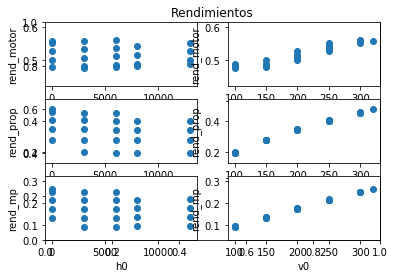

In [49]:
figura2 = plt.figure()
plt.title('Rendimientos')
ax2 = figura2.add_subplot(321)
plt.ylabel('rend_motor', fontsize=10)
plt.xlabel('h0', fontsize=10)
ax2.scatter(h0,rend_motor)

ax2 = figura2.add_subplot(322)
plt.ylabel('rend_motor', fontsize=10)
plt.xlabel('v0', fontsize=10)
ax2.scatter(v0,rend_motor)

ax2 = figura2.add_subplot(323)
ax2.scatter(h0,rend_prop)
plt.ylabel('rend_prop', fontsize=10)
plt.xlabel('v0', fontsize=10)

ax2 = figura2.add_subplot(324)
ax2.scatter(v0,rend_prop)
plt.ylabel('rend_prop', fontsize=10)
plt.xlabel('v0', fontsize=10)

ax2 = figura2.add_subplot(325)
ax2.scatter(h0,rend_mp)
plt.ylabel('rend_mp', fontsize=10)
plt.xlabel('h0', fontsize=10)

ax2 = figura2.add_subplot(326)
plt.ylabel('rend_mp', fontsize=10)
plt.xlabel('v0', fontsize=10)
ax2.scatter(v0,rend_mp)
plt.show()



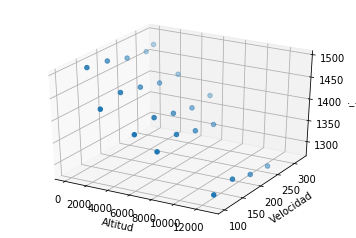

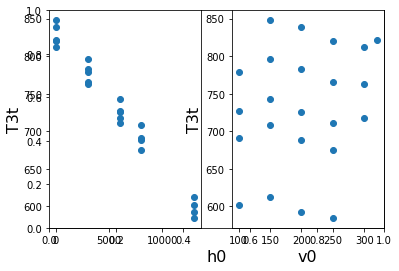

In [50]:
figura = plt.figure()
ax = figura.add_subplot(111, projection='3d')
ax.scatter(h0,v0,T4t,)
ax.set_xlabel('Altitud')
ax.set_ylabel('Velocidad')
ax.set_zlabel('._.')

figura2 = plt.figure()
plt.ylabel('T3t', fontsize=16)
plt.xlabel('h0', fontsize=16)
ax2 = figura2.add_subplot(121)
ax2.scatter(h0,T3t)
ax2 = figura2.add_subplot(122)
plt.ylabel('T3t', fontsize=16)
plt.xlabel('v0', fontsize=16)
ax2.scatter(v0,T3t)
plt.show()

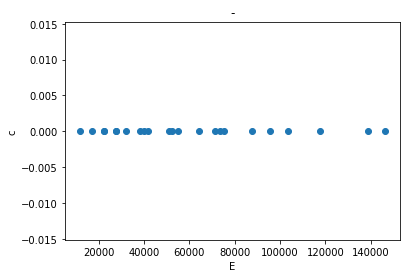

In [51]:
figura3 = plt.figure()
plt.scatter(Eneto, Cesp)
plt.ylabel('c')
plt.xlabel('E')
plt.title('-')
plt.show()